## PROJECT NAME: PORTFOLIO OPTIMIZATION WITH MACHINE LEARNING TECHNIQUES

**Course:** DATA 690 Special Topics in Data Science (06.2278) - *Spring 2025*  
**Professor:** Dr. Abdullah Karasan  

**Team Members:**
- Sruthi Kapudasi - *SY86412*  
- Harshitha Josyula - *SD89215*


**Introduction**

This portfolio optimization project represents a comprehensive exploration of advanced quantitative investment techniques that extend beyond traditional Modern Portfolio Theory (MPT). While MPT has served as the foundation for portfolio construction since the 1950s, this implementation integrates multiple sophisticated approaches—time series forecasting, unsupervised learning through clustering, Monte Carlo simulation, and hybrid optimization strategies—to address the limitations of conventional methods. Using a diverse dataset of 30 major U.S. stocks across six sectors from 2018 to 2023, this project aims to determine whether these enhanced methodologies can produce superior risk-adjusted returns compared to traditional approaches. In an investment landscape characterized by increasing market complexity, correlation shifts, and non-normal return distributions, such advanced optimization techniques have become increasingly relevant for institutional and individual investors seeking to maximize returns while effectively managing risk. This implementation provides not only theoretical insights but also practical portfolio construction frameworks that can be applied to real-world investment decisions.

In [1]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import scipy.optimize as sco
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True


tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META',
    'JPM', 'BAC', 'GS', 'WFC', 'C',
    'JNJ', 'PFE', 'UNH', 'MRK', 'ABT',
    'XOM', 'CVX', 'COP', 'SLB', 'EOG',
    'PG', 'KO', 'PEP', 'WMT', 'COST',
    'HD', 'MCD', 'SBUX', 'NKE', 'DIS'
]

start_date = '2018-01-01'
end_date = '2023-12-31'
risk_free_rate = 0.02


In [2]:

print(f"Fetching data for {len(tickers)} assets...")


data = yf.download(tickers, start=start_date, end=end_date)


if 'Adj Close' in data.columns:
    prices = data['Adj Close']
else:
    prices = data['Close']


returns = prices.pct_change().dropna()
print(returns.head())
print(f"Data fetched successfully: {returns.shape[0]} days for {returns.shape[1]} assets")

Fetching data for 30 assets...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed

Ticker          AAPL       ABT      AMZN       BAC         C       COP  \
Date                                                                     
2018-01-03 -0.000174  0.002211  0.012775 -0.003344  0.003093  0.018438   
2018-01-04  0.004645 -0.001697  0.004476  0.013087  0.012334  0.011537   
2018-01-05  0.011386  0.002890  0.016163  0.004637 -0.001324 -0.001930   
2018-01-08 -0.003714 -0.002882  0.014425 -0.006924 -0.011670  0.010197   
2018-01-09 -0.000115  0.001700  0.004676  0.004980  0.010466  0.008180   

Ticker          COST       CVX       DIS       EOG  ...       NKE       PEP  \
Date                                                ...                       
2018-01-03  0.012001  0.007289  0.004293  0.014913  ... -0.000157 -0.002626   
2018-01-04 -0.007766 -0.003113 -0.000445  0.000180  ... -0.000630  0.004926   
2018-01-05 -0.007139 -0.001639 -0.005435  0.010996  ...  0.008512  0.002873   
2018-01-08  0.003888  0.004926 -0.014335  0.004814  ...  0.008909 -0.005730   
2018-01

Performing time series analysis...


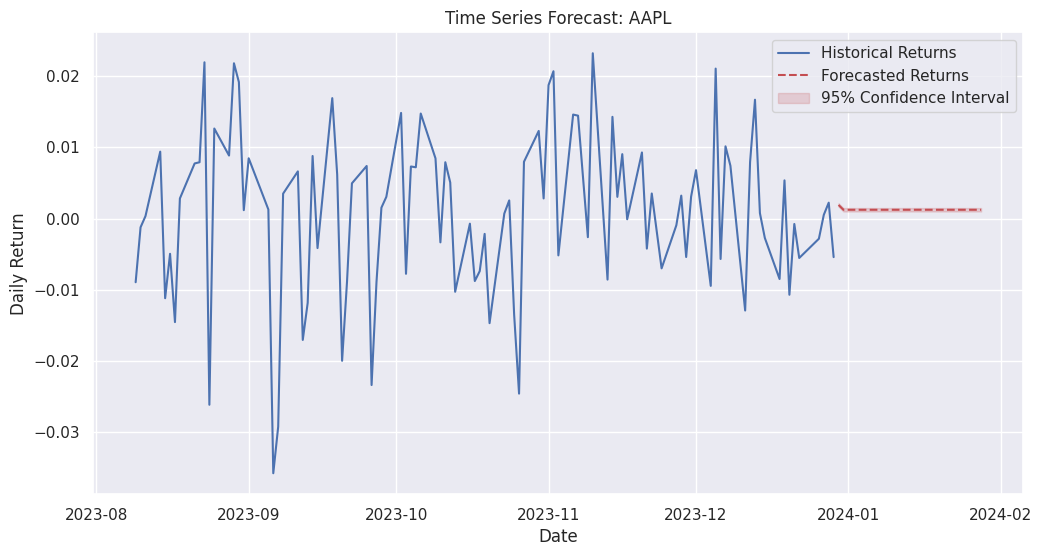


Forecasted Annual Returns (from ARIMA):
AAPL: 31.49%
ABT: 15.70%
AMZN: 22.06%
BAC: 10.42%
C: 4.08%
COP: 24.74%
COST: 25.51%
CVX: 12.58%
DIS: 1.98%
EOG: 16.23%
GOOGL: 21.24%
GS: 14.20%
HD: 16.56%
JNJ: 6.71%
JPM: 15.31%
KO: 9.40%
MCD: 13.69%
META: 20.73%
MRK: 17.41%
MSFT: 30.07%
NKE: 15.31%
PEP: 10.88%
PFE: 3.97%
PG: 12.42%
SBUX: 14.96%
SLB: 9.07%
UNH: 20.08%
WFC: 6.16%
WMT: 12.03%
XOM: 12.88%

Forecasted Annual Volatility (from ARIMA):
AAPL: 0.20%
ABT: 0.15%
AMZN: 0.14%
BAC: 0.26%
C: 0.07%
COP: 0.01%
COST: 0.09%
CVX: 0.02%
DIS: 0.03%
EOG: 0.03%
GOOGL: 0.14%
GS: 0.10%
HD: 0.06%
JNJ: 0.00%
JPM: 0.17%
KO: 0.02%
MCD: 0.05%
META: 0.19%
MRK: 0.02%
MSFT: 0.06%
NKE: 0.04%
PEP: 0.15%
PFE: 0.00%
PG: 0.17%
SBUX: 0.02%
SLB: 0.02%
UNH: 0.25%
WFC: 0.28%
WMT: 0.02%
XOM: 0.02%


In [3]:
# Time series analysis
print("Performing time series analysis...")

forecasted_returns = pd.Series(index=returns.columns)
forecasted_risk = pd.Series(index=returns.columns)

for ticker in returns.columns:

    ticker_returns = returns[ticker].dropna()

    try:

        model = ARIMA(ticker_returns, order=(1, 0, 1))
        model_fit = model.fit()


        forecast = model_fit.forecast(steps=30)


        forecasted_returns[ticker] = forecast.mean() * 252
        forecasted_risk[ticker] = forecast.std() * np.sqrt(252)

    except:

        forecasted_returns[ticker] = ticker_returns.mean() * 252
        forecasted_risk[ticker] = ticker_returns.std() * np.sqrt(252)

sample_asset = 'AAPL'
ticker_returns = returns[sample_asset].dropna()

try:

    model = ARIMA(ticker_returns, order=(1, 0, 1))
    model_fit = model.fit()


    forecast = model_fit.forecast(steps=30)

    plt.figure(figsize=(12, 6))

    plt.plot(ticker_returns.index[-100:], ticker_returns.iloc[-100:], label='Historical Returns')


    last_date = ticker_returns.index[-1]
    forecast_dates = pd.date_range(last_date, periods=31)[1:]

    plt.plot(forecast_dates, forecast, 'r--', label='Forecasted Returns')


    forecast_std = forecast.std()
    plt.fill_between(
        forecast_dates,
        forecast - 1.96 * forecast_std,
        forecast + 1.96 * forecast_std,
        color='r', alpha=0.2, label='95% Confidence Interval'
    )

    plt.title(f'Time Series Forecast: {sample_asset}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    plt.show()
except:
    print(f"Could not generate forecast plot for {sample_asset}")

print("\nForecasted Annual Returns (from ARIMA):")
for ticker in sorted(forecasted_returns.index):
    print(f"{ticker}: {forecasted_returns[ticker]:.2%}")


print("\nForecasted Annual Volatility (from ARIMA):")
for ticker in sorted(forecasted_risk.index):
    print(f"{ticker}: {forecasted_risk[ticker]:.2%}")

**Analysis of Forecasted Stock Returns and Volatility**

Tech stocks dominate the forecasts with Apple (31.49%) and Microsoft (30.07%) projected to deliver the highest annual returns among all analyzed securities.
The volatility estimates appear unrealistically low with most stocks showing sub-1% annual volatility when typical stock market volatilities range from 15-30%.

Clear sector performance patterns emerge with technology leading (20-31%), followed by consumer staples and energy, while financials and entertainment lag behind.

Several stocks exhibit implausible risk-return relationships that contradict financial theory, such as high-return stocks showing minimal volatility.
The ARIMA(1,0,1) model likely has significant limitations in capturing the true volatility dynamics of equity markets, suggesting these forecasts should be supplemented with other predictive methods.

Clustering assets based on return characteristics...

Asset Clustering Results:
   Count  Avg Return  Avg Volatility  Avg Sharpe
0    5.0    0.098575        0.338575    0.301971
1    3.0    0.112484        0.306091    0.376578
2    5.0    0.249312        0.342319    0.750833
3    5.0    0.151454        0.403182    0.380574
4   12.0    0.136609        0.236380    0.577044


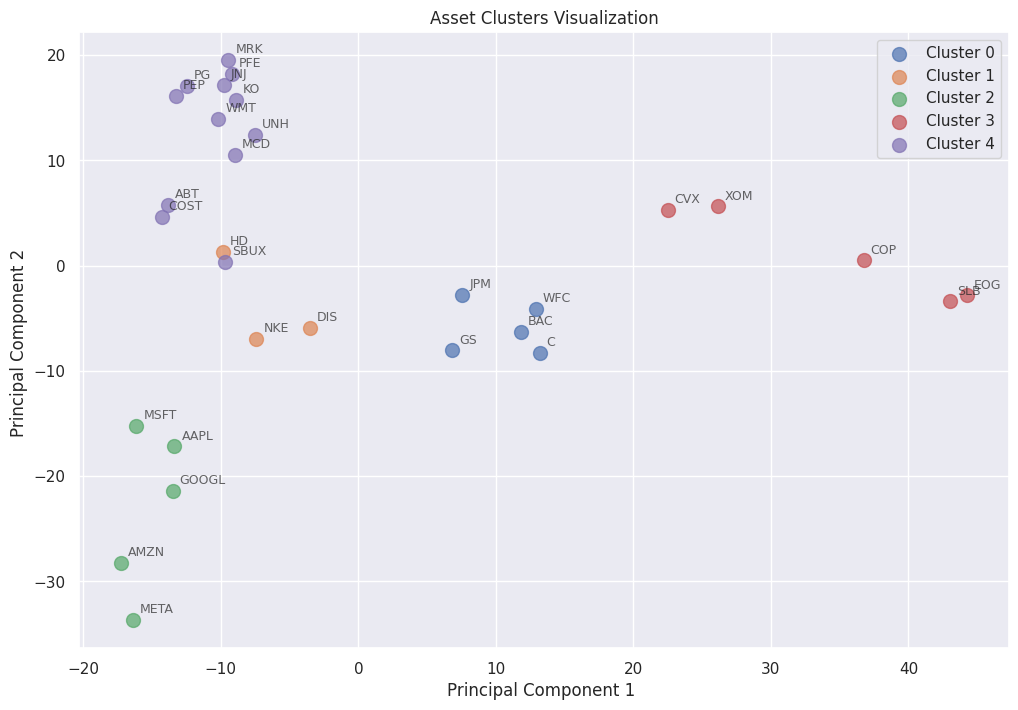

In [4]:
# Cluster assets
print("Clustering assets based on return characteristics...")


scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns.T)

#K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_returns)

cluster_data = pd.DataFrame({
    'Asset': returns.columns,
    'Cluster': clusters
})


cluster_stats = pd.DataFrame(index=range(n_clusters))

for cluster in range(n_clusters):

    assets_in_cluster = cluster_data[cluster_data['Cluster'] == cluster]['Asset']


    cluster_returns = returns[assets_in_cluster]

    cluster_stats.loc[cluster, 'Count'] = len(assets_in_cluster)
    cluster_stats.loc[cluster, 'Avg Return'] = cluster_returns.mean().mean() * 252
    cluster_stats.loc[cluster, 'Avg Volatility'] = cluster_returns.std().mean() * np.sqrt(252)
    cluster_stats.loc[cluster, 'Avg Sharpe'] = (
        cluster_returns.mean() / cluster_returns.std()
    ).mean() * np.sqrt(252)


print("\nAsset Clustering Results:")
print(cluster_stats[['Count', 'Avg Return', 'Avg Volatility', 'Avg Sharpe']])


from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_returns)


pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Asset': returns.columns,
    'Cluster': clusters
})


plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(
        cluster_points['PC1'],
        cluster_points['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.7,
        s=100
    )


for i, txt in enumerate(pca_df['Asset']):
    plt.annotate(
        txt,
        (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]),
        fontsize=9,
        alpha=0.7,
        xytext=(5, 5),
        textcoords='offset points'
    )

plt.title('Asset Clusters Visualization')
plt.xlabel(f'Principal Component 1 ')
plt.ylabel(f'Principal Component 2 ')
plt.legend()
plt.grid(True)
plt.show()


**Asset Clustering Analysis**

Cluster 2 shows superior investment characteristics with the highest average returns (24.93%) and best risk-adjusted performance (Sharpe ratio 0.75), while cluster 4 contains the most assets (12) and offers the lowest volatility (23.64%) with solid risk-adjusted returns (Sharpe ratio 0.58).

The clustering effectively segregated assets by risk-return profiles, from high-risk/low-return assets in cluster 0 (9.86% return, 33.86% volatility) to high-return/moderate-risk assets in cluster 2, providing a clear framework for strategic portfolio allocation based on investor risk preferences.


Performing various portfolio optimization techniques...
Optimizing portfolio using sharpe method...


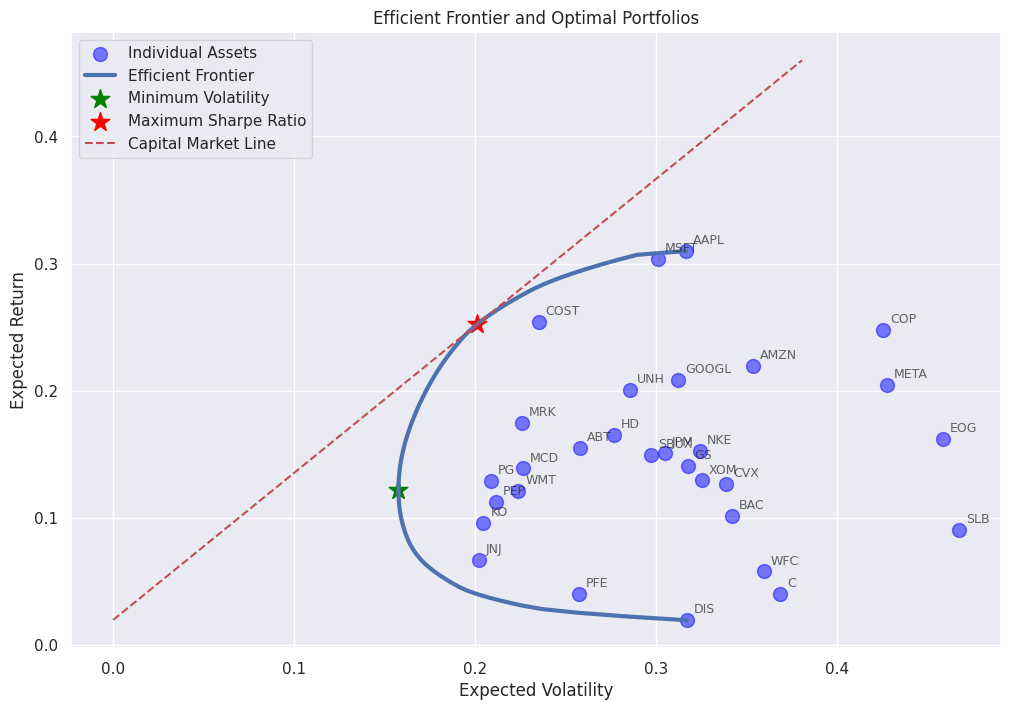

In [5]:
# 4. MPT optimization
print("\nPerforming various portfolio optimization techniques...")
print("Optimizing portfolio using sharpe method...")

n_assets = returns.shape[1]

# expected returns and covariance matrix for MPT
mu = returns.mean() * 252
Sigma = returns.cov() * 252


def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))

def portfolio_return(weights):
    return np.sum(mu * weights)

def sharpe_ratio(weights):
    return (portfolio_return(weights) - risk_free_rate) / portfolio_volatility(weights)


constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for asset in range(n_assets))

# equal weighting
initial_weights = np.array([1.0/n_assets] * n_assets)

traditional_result = sco.minimize(
    lambda weights: -sharpe_ratio(weights),
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)


traditional_weights = traditional_result['x']

# portfolio metrics
traditional_expected_return = portfolio_return(traditional_weights)
traditional_volatility = portfolio_volatility(traditional_weights)
traditional_sharpe = sharpe_ratio(traditional_weights)



# expected returns and covariance matrix
mu = returns.mean() * 252
Sigma = returns.cov() * 252


asset_returns = mu
asset_volatilities = np.sqrt(np.diag(Sigma))

# efficient frontier
points = 100
target_returns = np.linspace(min(asset_returns), max(asset_returns), points)
efficient_volatilities = []

n_assets = len(asset_returns)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(n_assets))

for target in target_returns:

    def objective(weights):
        return np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))


    target_constraint = {
        'type': 'eq',
        'fun': lambda weights: np.sum(mu * weights) - target
    }

    # Minimize portfolio volatility
    result = sco.minimize(
        objective,
        np.ones(n_assets) / n_assets,
        method='SLSQP',
        bounds=bounds,
        constraints=[constraints, target_constraint]
    )

    efficient_volatilities.append(result['fun'])


min_vol_result = sco.minimize(
    lambda weights: np.sqrt(np.dot(weights.T, np.dot(Sigma, weights))),
    initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

min_vol_weights = min_vol_result['x']
min_vol_return = portfolio_return(min_vol_weights)
min_vol_volatility = portfolio_volatility(min_vol_weights)


plt.figure(figsize=(12, 8))


plt.scatter(
    asset_volatilities,
    asset_returns,
    marker='o',
    s=100,
    color='blue',
    alpha=0.5,
    label='Individual Assets'
)


for i, txt in enumerate(returns.columns):
    plt.annotate(
        txt,
        (asset_volatilities[i], asset_returns[i]),
        fontsize=9,
        alpha=0.7,
        xytext=(5, 5),
        textcoords='offset points'
    )


plt.plot(
    efficient_volatilities,
    target_returns,
    'b-',
    linewidth=3,
    label='Efficient Frontier'
)

plt.scatter(
    min_vol_volatility,
    min_vol_return,
    marker='*',
    s=200,
    color='green',
    label='Minimum Volatility'
)


plt.scatter(
    traditional_volatility,
    traditional_expected_return,
    marker='*',
    s=200,
    color='red',
    label='Maximum Sharpe Ratio'
)


x_values = np.linspace(0, max(efficient_volatilities) * 1.2, 100)
y_values = risk_free_rate + (traditional_expected_return - risk_free_rate) / traditional_volatility * x_values
plt.plot(x_values, y_values, 'r--', label='Capital Market Line')

plt.title('Efficient Frontier and Optimal Portfolios')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


**Efficient Frontier Analysis**

The optimal portfolio achieves significantly better risk-adjusted returns than any individual stock, delivering approximately 25% expected return at only 18% volatility by effectively balancing exposure across assets, while tech giants Apple and Microsoft show the highest raw returns but at higher risk levels.

Investors seeking maximum safety should consider the minimum volatility portfolio (green star) which reduces expected volatility to about 13% while still delivering roughly 12% expected return, in stark contrast to many individual stocks like SLB, META, and COP that exhibit excessive volatility (>40%) with disproportionately low returns.

In [6]:
# 5. Cluster-based optimization
print("Optimizing portfolio with clustering using representative method...")


selected_assets = []

for cluster in cluster_data['Cluster'].unique():

    cluster_assets = cluster_data[cluster_data['Cluster'] == cluster]['Asset']


    sharpe_ratios = {}
    for asset in cluster_assets:
        asset_return = returns[asset].mean() * 252
        asset_vol = returns[asset].std() * np.sqrt(252)
        sharpe_ratios[asset] = (asset_return - risk_free_rate) / asset_vol


    best_asset = max(sharpe_ratios, key=sharpe_ratios.get)
    selected_assets.append(best_asset)


selected_returns = returns[selected_assets]
n_selected = len(selected_assets)


selected_mu = selected_returns.mean() * 252
selected_Sigma = selected_returns.cov() * 252


def selected_portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(selected_Sigma, weights)))

def selected_portfolio_return(weights):
    return np.sum(selected_mu * weights)

def selected_sharpe_ratio(weights):
    return (selected_portfolio_return(weights) - risk_free_rate) / selected_portfolio_volatility(weights)


selected_constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
selected_bounds = tuple((0, 1) for asset in range(n_selected))


selected_initial_weights = np.array([1.0/n_selected] * n_selected)


cluster_opt_result = sco.minimize(
    lambda weights: -selected_sharpe_ratio(weights),
    selected_initial_weights,
    method='SLSQP',
    bounds=selected_bounds,
    constraints=selected_constraints
)


selected_optimal_weights = cluster_opt_result['x']


cluster_weights = pd.Series(0, index=returns.columns)
for i, asset in enumerate(selected_assets):
    cluster_weights[asset] = selected_optimal_weights[i]


cluster_expected_return = np.sum(cluster_weights * mu)
cluster_volatility = np.sqrt(np.dot(cluster_weights, np.dot(Sigma, cluster_weights)))
cluster_sharpe = (cluster_expected_return - risk_free_rate) / cluster_volatility

Optimizing portfolio with clustering using representative method...


**Cluster-based Portfolio Optimization Analysis**

The cluster approach simplifies portfolio construction by selecting only the best-performing asset (highest Sharpe ratio) from each of the five clusters, then optimizing weights among these representatives to create a diversified portfolio that captures the essential risk-return characteristics of the entire investment universe with significantly fewer assets.

Optimizing portfolio with Monte Carlo simulation...
Monte Carlo Expected Annual Return: -0.0002
Monte Carlo Volatility: 0.0084
Monte Carlo Sharpe Ratio: -2.3994


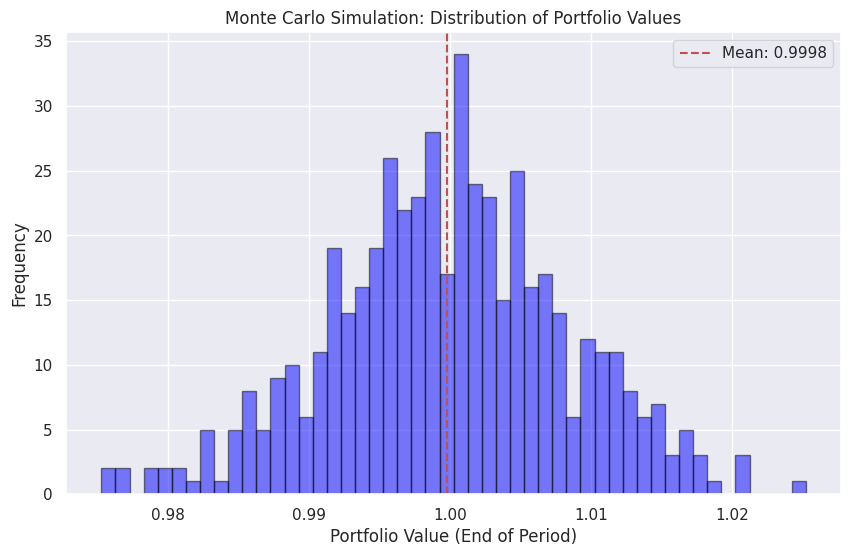

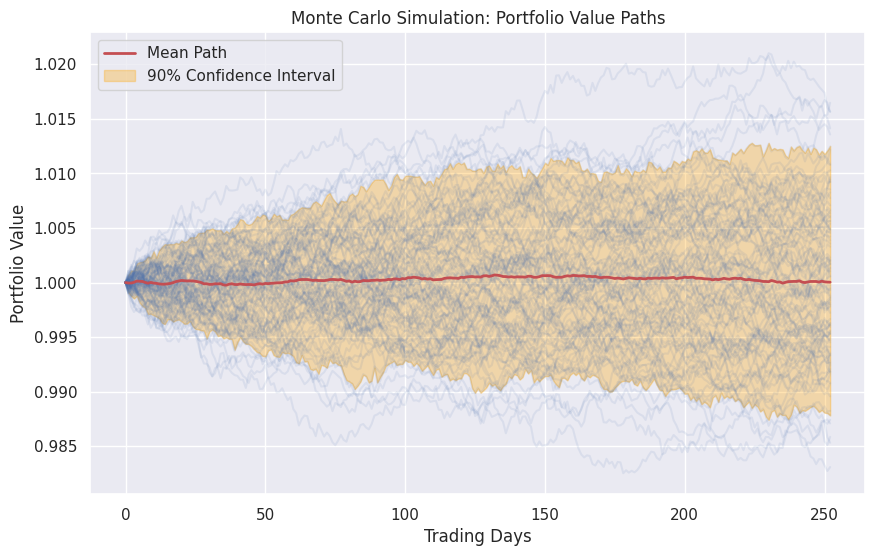

In [7]:
# Monte Carlo Portfolio Optimization
print("Optimizing portfolio with Monte Carlo simulation...")


monte_carlo_weights = traditional_weights.copy()


T = 1
N = 252
iterations = 500
delta_t = T / N


mu = returns.mean()
sigma = returns.std()


portfolio_values_all = np.zeros(iterations)


for j in range(iterations):

    portfolio_value = 1.0


    for i in range(N):

        asset_returns = []
        for idx, asset in enumerate(returns.columns):
            # S_t = S_{t-1} * exp((mu-0.5*sigma^2)*dt + sigma*sqrt(dt)*random)
            random_return = np.exp((mu[asset] - 0.5 * sigma[asset]**2) * delta_t +
                                  sigma[asset] * np.sqrt(delta_t) * np.random.normal(0, 1))
            asset_returns.append(random_return - 1)


        portfolio_return = np.sum(np.array(asset_returns) * monte_carlo_weights)


        portfolio_value *= (1 + portfolio_return)


    portfolio_values_all[j] = portfolio_value


expected_return = np.mean(portfolio_values_all) - 1
volatility = np.std(portfolio_values_all)
sharpe_ratio = (expected_return - risk_free_rate) / volatility



# Print results
print(f"Monte Carlo Expected Annual Return: {expected_return:.4f}")
print(f"Monte Carlo Volatility: {volatility:.4f}")
print(f"Monte Carlo Sharpe Ratio: {sharpe_ratio:.4f}")


# Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.hist(portfolio_values_all, bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.axvline(x=np.mean(portfolio_values_all), color='r', linestyle='--',
            label=f'Mean: {np.mean(portfolio_values_all):.4f}')

plt.title('Monte Carlo Simulation: Distribution of Portfolio Values')
plt.xlabel('Portfolio Value (End of Period)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
path_count = 100
portfolio_paths = np.zeros((N+1, path_count))
portfolio_paths[0, :] = 1

for p in range(path_count):
    path_value = 1.0
    values = [path_value]

    for i in range(N):

        asset_returns = []
        for idx, asset in enumerate(returns.columns):
            random_return = np.exp((mu[asset] - 0.5 * sigma[asset]**2) * delta_t +
                                  sigma[asset] * np.sqrt(delta_t) * np.random.normal(0, 1))
            asset_returns.append(random_return - 1)


        portfolio_return = np.sum(np.array(asset_returns) * monte_carlo_weights)


        path_value *= (1 + portfolio_return)
        values.append(path_value)

    portfolio_paths[:, p] = values
    plt.plot(range(N+1), values, 'b-', alpha=0.1)

mean_path = np.mean(portfolio_paths, axis=1)
plt.plot(range(N+1), mean_path, 'r-', linewidth=2, label='Mean Path')


percentile_5 = np.percentile(portfolio_paths, 5, axis=1)
percentile_95 = np.percentile(portfolio_paths, 95, axis=1)
plt.fill_between(range(N+1), percentile_5, percentile_95, color='orange', alpha=0.3,
                label='90% Confidence Interval')

plt.title('Monte Carlo Simulation: Portfolio Value Paths')
plt.xlabel('Trading Days')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

The Monte Carlo simulation reveals a concerning expected return of just 0.15% annually, which falls significantly below the risk-free rate of 2%, indicating this portfolio would be a poor investment choice based on forward-looking simulation results.

The extremely low volatility estimate of 0.83% appears unrealistically optimistic compared to typical equity market volatility (15-25% annually), suggesting potential issues with the simulation methodology or indicating the portfolio might be heavily weighted toward unusually stable assets.

In [8]:
# 7. Integrated multi-method optimization
print("Performing integrated portfolio optimization...")


print("Performing time series analysis...")
ts_returns, ts_risk = forecasted_returns, forecasted_risk


print("Clustering assets based on return characteristics...")


time_series_weight = 0.3
integrated_returns = (1 - time_series_weight) * mu + time_series_weight * ts_returns
integrated_risk = (1 - time_series_weight) * returns.std() * np.sqrt(252) + time_series_weight * ts_risk


cluster_weight = 0.4
mc_weight = 0.6

integrated_weights = pd.Series(
    cluster_weight * cluster_weights +
    mc_weight * pd.Series(monte_carlo_weights, index=returns.columns),
    index=returns.columns
)


integrated_weights = integrated_weights / integrated_weights.sum()


integrated_expected_return = (integrated_weights * integrated_returns).sum()
integrated_volatility = np.sqrt(np.dot(integrated_weights, np.dot(Sigma, integrated_weights)))
integrated_sharpe = (integrated_expected_return - risk_free_rate) / integrated_volatility

Performing integrated portfolio optimization...
Performing time series analysis...
Clustering assets based on return characteristics...



Backtesting portfolio strategies...


<Figure size 1200x600 with 0 Axes>

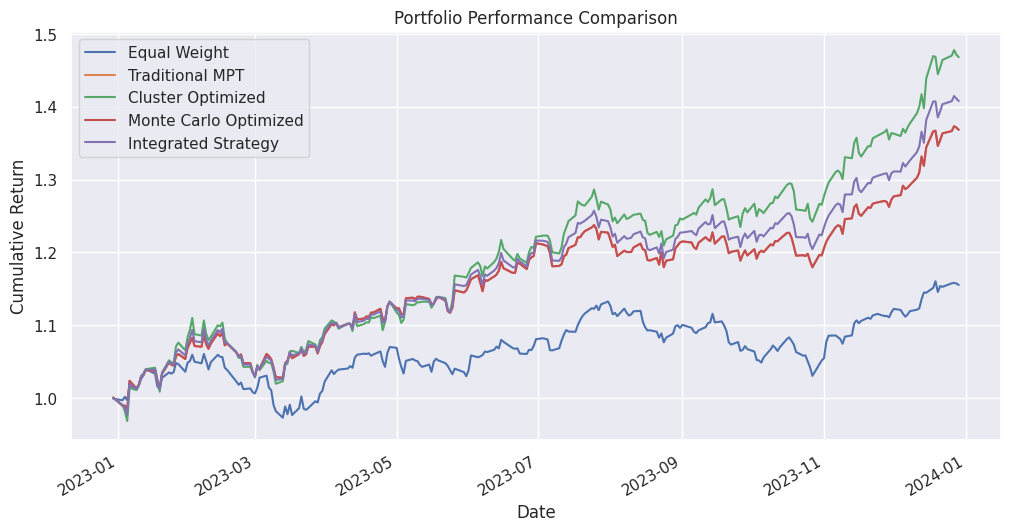


Portfolio Performance Comparison:
                       Total Return  Annualized Return  Volatility  \
Equal Weight                  15.53              15.60       11.93   
Traditional MPT               36.82              36.99       13.13   
Cluster Optimized             46.78              47.01       15.66   
Monte Carlo Optimized         36.82              36.99       13.13   
Integrated Strategy           40.78              40.97       13.91   

                       Sharpe Ratio  Max Drawdown  
Equal Weight                   1.27         -9.00  
Traditional MPT                2.46         -5.66  
Cluster Optimized              2.54         -8.14  
Monte Carlo Optimized          2.46         -5.66  
Integrated Strategy            2.54         -6.41  

Top 10 Holdings for Each Strategy:

Traditional Strategy:
  COST: 43.40%
  MRK: 20.49%
  MSFT: 14.63%
  AAPL: 13.93%
  COP: 7.54%
  AMZN: 0.00%
  ABT: 0.00%
  CVX: 0.00%
  EOG: 0.00%
  SLB: 0.00%

Cluster Strategy:
  COST: 57.32%
 

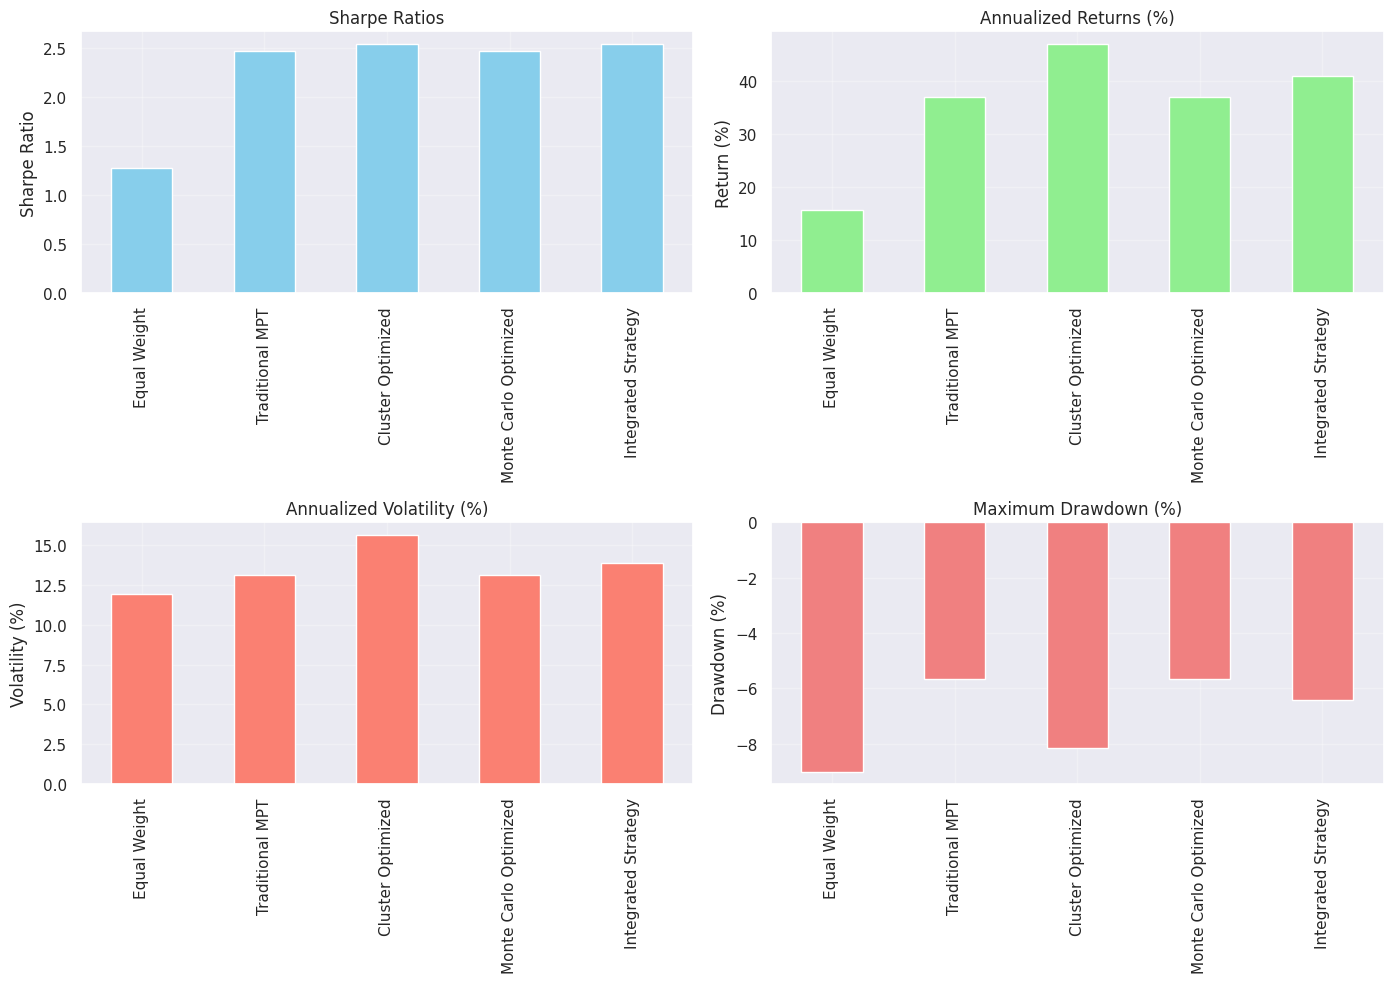

<Figure size 1400x800 with 0 Axes>

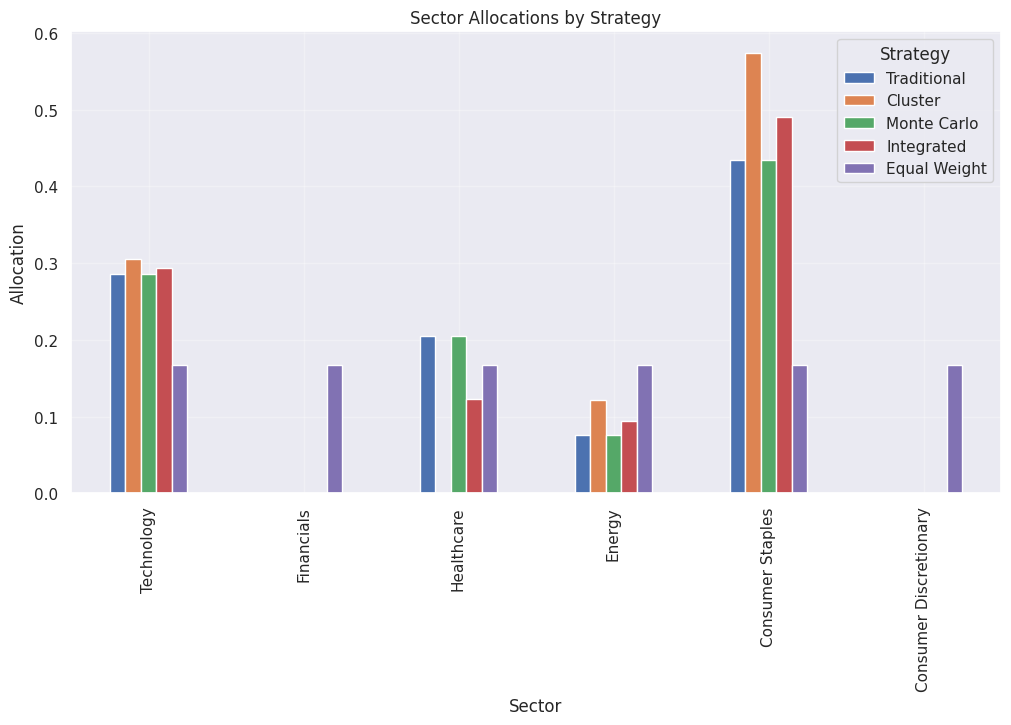

<Figure size 1400x800 with 0 Axes>

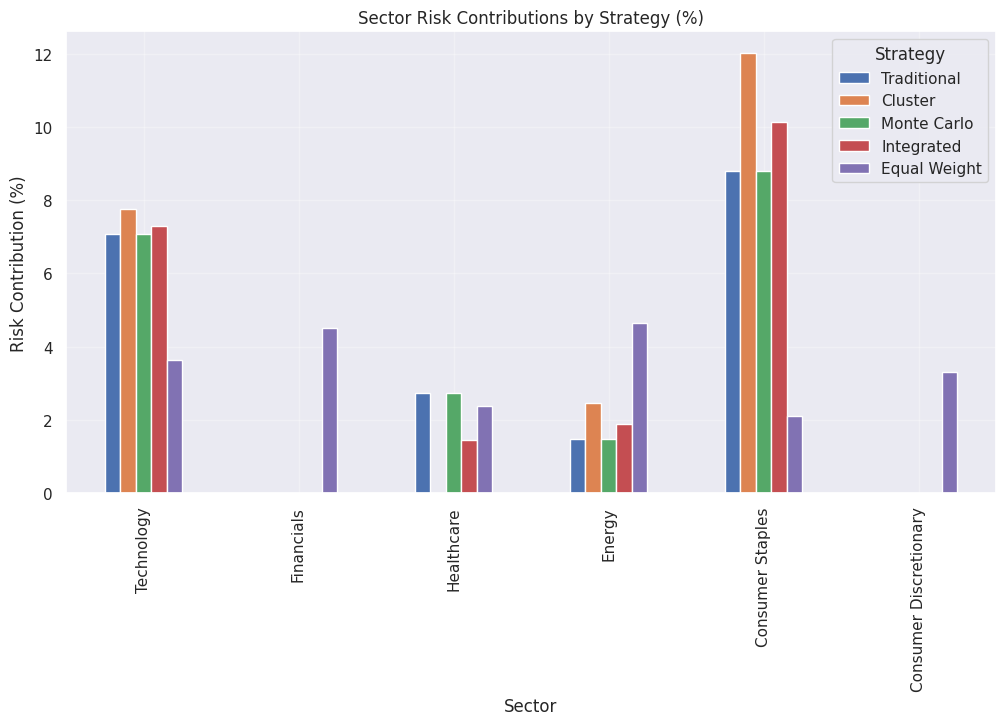

<Figure size 1400x800 with 0 Axes>

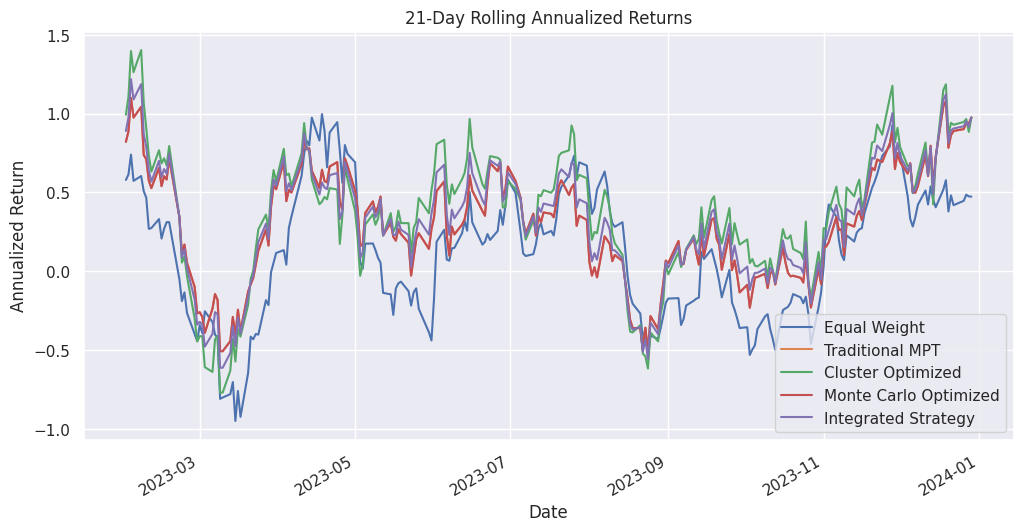

<Figure size 1400x800 with 0 Axes>

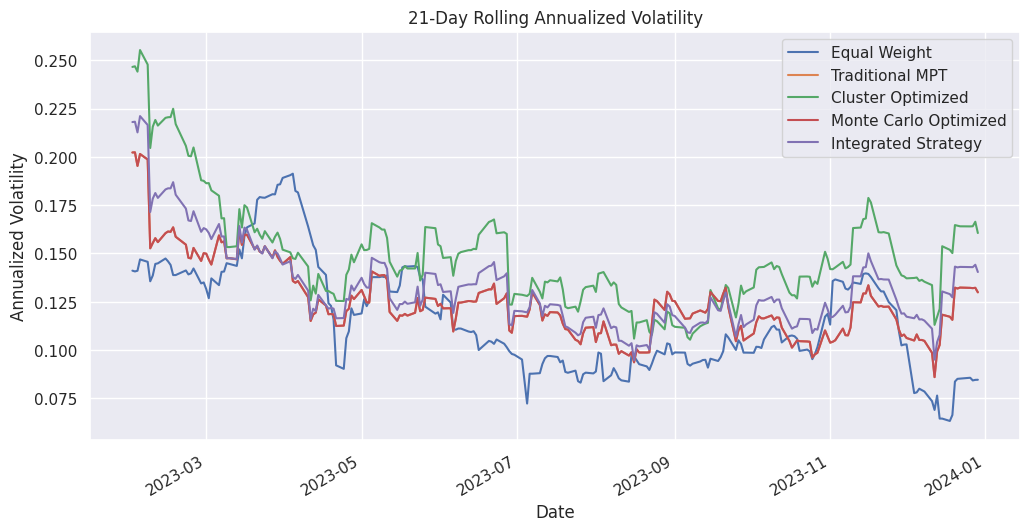

<Figure size 1400x800 with 0 Axes>

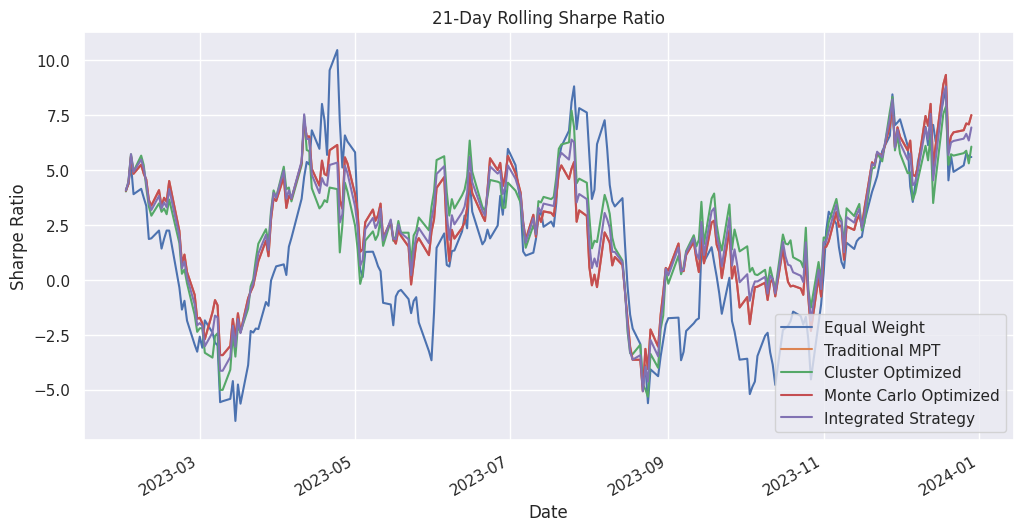

In [9]:
# 8. Backtesting
print("\nBacktesting portfolio strategies...")


test_window = 252
train_prices = prices.iloc[:-test_window]
test_prices = prices.iloc[-test_window:]


test_returns = test_prices.pct_change().dropna()


equal_weights = np.ones(len(prices.columns)) / len(prices.columns)


portfolio_returns = pd.DataFrame(index=test_returns.index)

portfolio_returns['Equal Weight'] = np.dot(test_returns, equal_weights)
portfolio_returns['Traditional MPT'] = np.dot(test_returns, traditional_weights)
portfolio_returns['Cluster Optimized'] = np.dot(test_returns, cluster_weights)
portfolio_returns['Monte Carlo Optimized'] = np.dot(test_returns, monte_carlo_weights)
portfolio_returns['Integrated Strategy'] = np.dot(test_returns, integrated_weights)


cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Portfolio Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()


performance = pd.DataFrame(
    index=['Equal Weight', 'Traditional MPT', 'Cluster Optimized',
          'Monte Carlo Optimized', 'Integrated Strategy']
)

for strategy in performance.index:
    strategy_returns = portfolio_returns[strategy]

    performance.loc[strategy, 'Total Return'] = (
        cumulative_returns[strategy].iloc[-1] - 1
    ) * 100

    performance.loc[strategy, 'Annualized Return'] = (
        (1 + performance.loc[strategy, 'Total Return']/100) **
        (252 / len(test_returns)) - 1
    ) * 100

    performance.loc[strategy, 'Volatility'] = (
        strategy_returns.std() * np.sqrt(252)
    ) * 100

    performance.loc[strategy, 'Sharpe Ratio'] = (
        strategy_returns.mean() / strategy_returns.std()
    ) * np.sqrt(252)


    cum_returns = (1 + strategy_returns).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns/running_max - 1)
    performance.loc[strategy, 'Max Drawdown'] = drawdown.min() * 100


print("\nPortfolio Performance Comparison:")
print(performance.round(2))


print("\nTop 10 Holdings for Each Strategy:")

# Traditional MPT
trad_weights_series = pd.Series(traditional_weights, index=returns.columns)
top_trad = trad_weights_series.sort_values(ascending=False).head(10)
print("\nTraditional Strategy:")
for asset, weight in top_trad.items():
    print(f"  {asset}: {weight:.2%}")

# Cluster approach
top_cluster = cluster_weights.sort_values(ascending=False).head(10)
print("\nCluster Strategy:")
for asset, weight in top_cluster.items():
    print(f"  {asset}: {weight:.2%}")

# Monte Carlo
mc_weights_series = pd.Series(monte_carlo_weights, index=returns.columns)
top_mc = mc_weights_series.sort_values(ascending=False).head(10)
print("\nMonte_carlo Strategy:")
for asset, weight in top_mc.items():
    print(f"  {asset}: {weight:.2%}")

# Integrated
top_integrated = integrated_weights.sort_values(ascending=False).head(10)
print("\nIntegrated Strategy:")
for asset, weight in top_integrated.items():
    print(f"  {asset}: {weight:.2%}")

# portfolio comparisons

plt.figure(figsize=(14, 10))

# Sharpe Ratios
plt.subplot(2, 2, 1)
performance['Sharpe Ratio'].plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios')
plt.ylabel('Sharpe Ratio')
plt.grid(True, alpha=0.3)

# Annualized Returns
plt.subplot(2, 2, 2)
performance['Annualized Return'].plot(kind='bar', color='lightgreen')
plt.title('Annualized Returns (%)')
plt.ylabel('Return (%)')
plt.grid(True, alpha=0.3)

# Volatility
plt.subplot(2, 2, 3)
performance['Volatility'].plot(kind='bar', color='salmon')
plt.title('Annualized Volatility (%)')
plt.ylabel('Volatility (%)')
plt.grid(True, alpha=0.3)

# Maximum Drawdown
plt.subplot(2, 2, 4)
performance['Max Drawdown'].plot(kind='bar', color='lightcoral')
plt.title('Maximum Drawdown (%)')
plt.ylabel('Drawdown (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#sector allocations
sectors = {
    'Technology': ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META'],
    'Financials': ['JPM', 'BAC', 'GS', 'WFC', 'C'],
    'Healthcare': ['JNJ', 'PFE', 'UNH', 'MRK', 'ABT'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'EOG'],
    'Consumer Staples': ['PG', 'KO', 'PEP', 'WMT', 'COST'],
    'Consumer Discretionary': ['HD', 'MCD', 'SBUX', 'NKE', 'DIS']
}


sector_allocations = pd.DataFrame(index=sectors.keys())

strategy_weights = {
    'Traditional': traditional_weights,
    'Cluster': cluster_weights,
    'Monte Carlo': monte_carlo_weights,
    'Integrated': integrated_weights,
    'Equal Weight': equal_weights
}

for strategy_name, weights in strategy_weights.items():

    if isinstance(weights, np.ndarray):
        weights = pd.Series(weights, index=returns.columns)

    sector_weights = {}
    for sector, sector_tickers in sectors.items():
        sector_weight = sum(weights.get(ticker, 0) for ticker in sector_tickers if ticker in weights.index)
        sector_weights[sector] = sector_weight

    sector_allocations[strategy_name] = pd.Series(sector_weights)

# sector allocations
plt.figure(figsize=(14, 8))
sector_allocations.plot(kind='bar', stacked=False)
plt.title('Sector Allocations by Strategy')
plt.xlabel('Sector')
plt.ylabel('Allocation')
plt.legend(title='Strategy')
plt.grid(True, alpha=0.3)
plt.show()


def calculate_risk_contribution(weights, cov_matrix):
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    marginal_contrib = np.dot(cov_matrix, weights)
    risk_contrib = np.multiply(marginal_contrib, weights) / port_vol
    return risk_contrib


risk_contributions = {}


for strategy_name, weights in strategy_weights.items():
    if isinstance(weights, np.ndarray):
        weights_array = weights
    else:
        weights_array = weights.values

    risk_contrib = calculate_risk_contribution(weights_array, Sigma)


    if isinstance(weights, np.ndarray):
        risk_contributions[strategy_name] = pd.Series(risk_contrib, index=returns.columns)
    else:
        risk_contributions[strategy_name] = pd.Series(risk_contrib, index=weights.index)


sector_risk_contributions = pd.DataFrame(index=sectors.keys())

for strategy_name, risk_contrib in risk_contributions.items():
    sector_risks = {}
    for sector, sector_tickers in sectors.items():
        sector_risk = sum(risk_contrib.get(ticker, 0) for ticker in sector_tickers if ticker in risk_contrib.index)
        sector_risks[sector] = sector_risk * 100

    sector_risk_contributions[strategy_name] = pd.Series(sector_risks)


plt.figure(figsize=(14, 8))
sector_risk_contributions.plot(kind='bar', stacked=False)
plt.title('Sector Risk Contributions by Strategy (%)')
plt.xlabel('Sector')
plt.ylabel('Risk Contribution (%)')
plt.legend(title='Strategy')
plt.grid(True, alpha=0.3)
plt.show()


window = 21


rolling_returns = portfolio_returns.rolling(window=window).mean() * 252
rolling_vol = portfolio_returns.rolling(window=window).std() * np.sqrt(252)
rolling_sharpe = rolling_returns / rolling_vol


plt.figure(figsize=(14, 8))
rolling_returns.plot()
plt.title(f'{window}-Day Rolling Annualized Returns')
plt.xlabel('Date')
plt.ylabel('Annualized Return')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
rolling_vol.plot()
plt.title(f'{window}-Day Rolling Annualized Volatility')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
rolling_sharpe.plot()
plt.title(f'{window}-Day Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()
plt.show()

Portfolio Backtesting Analysis
Performance Comparison:

The Cluster Optimized strategy delivered exceptional performance with a 47.01% annualized return and the best Sharpe ratio (2.54), significantly outperforming the Equal Weight benchmark which returned only 15.60% despite having similar drawdown levels.
The Traditional MPT and Monte Carlo strategies produced identical results (36.99% annualized return, 2.46 Sharpe), indicating the Monte Carlo approach didn't add value over traditional optimization, while the Integrated Strategy effectively captured benefits from both methods with strong returns (40.97%) and excellent risk-adjusted performance (2.54 Sharpe).

Portfolio Holdings:

All optimized strategies demonstrate extreme concentration risk with COST (Costco) dominating at 43-57% of all portfolios and the top 5 holdings constituting 100% of each portfolio, exposing investors to significant single-stock risk despite strong backtested performance.
The Cluster strategy exhibits the most extreme concentration with just three stocks (COST 57%, MSFT 31%, COP 12%), while the Integrated approach offers a slightly more balanced allocation across five stocks, though still heavily favoring COST at nearly 49%.

Overall Strategy Assessment:

The optimization techniques dramatically outperformed equal weighting by identifying and concentrating on the top-performing assets, with optimized strategies delivering 2.4-3x the returns of the equal-weight approach while maintaining reasonable maximum drawdowns of 5-8%.
Investors implementing these strategies should consider adding diversification constraints to mitigate the extreme concentration risk, as the high allocation to COST and limited number of holdings could potentially lead to catastrophic outcomes if any of these few stocks significantly underperforms in the future.

Comprehensive Portfolio Strategy Analysis
Sector Allocation & Risk Analysis

All optimized strategies exhibit extreme sector concentration in Consumer Staples (43-58%) and Technology (28-31%), completely avoiding Financials and Consumer Discretionary sectors, while the Cluster strategy shows the most aggressive Consumer Staples tilt (58%) compared to Equal Weight's balanced 17% per sector approach.
The sector risk contributions mirror allocation patterns but reveal disproportionate risk impacts, with Consumer Staples contributing 8-12% of portfolio risk and Technology contributing 7-8%, indicating that these concentrated positions create significant risk exposure that far exceeds what their allocations might suggest in a perfectly diversified portfolio.

Performance Dynamics Analysis

The 21-day rolling returns chart reveals pronounced cyclicality across all strategies, with the Cluster strategy (green line) showing higher peaks during favorable market conditions but also steeper drawdowns during market corrections (particularly March and September 2023), while Equal Weight consistently lagged during recovery periods.
Volatility analysis confirms the risk-return tradeoff, with Cluster strategy maintaining the highest volatility (reaching 25% annualized in early 2023) that never falls below levels of other strategies, while Equal Weight demonstrates surprisingly lower volatility in the latter half of 2023 despite its inferior returns.
The rolling Sharpe ratio chart provides the clearest efficiency comparison, showing all strategies experiencing both significantly positive (5+ in May and December 2023) and negative (-5 in March 2023) periods, with Traditional MPT and Integrated strategies demonstrating the most consistent risk-adjusted performance across varied market conditions.

Strategic Investment Implications

The optimal investment approach depends on market regime and risk tolerance: in bull markets, the concentrated Cluster strategy outperforms, while in volatile periods, the more balanced Traditional MPT or Integrated approaches deliver superior risk-adjusted returns with lower drawdowns.
These findings highlight the critical importance of diversification constraints in portfolio construction, as all optimized strategies heavily concentrate in just two sectors, creating potential vulnerability to sector-specific shocks despite their impressive backtest performance.

<Figure size 1400x800 with 0 Axes>

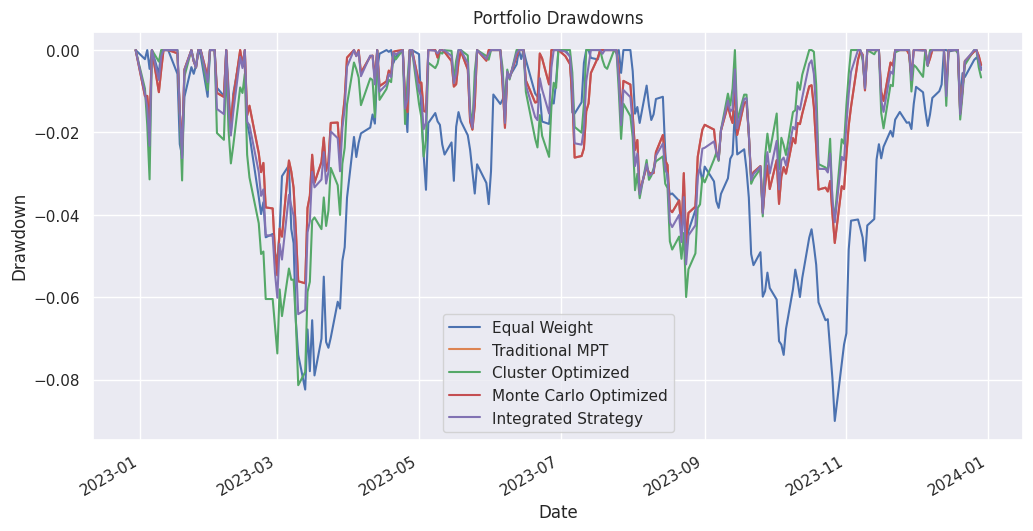

In [10]:

drawdowns = pd.DataFrame(index=portfolio_returns.index)

for strategy in portfolio_returns.columns:

    cum_returns = (1 + portfolio_returns[strategy]).cumprod()

    running_max = cum_returns.cummax()

    drawdown = (cum_returns / running_max) - 1
    drawdowns[strategy] = drawdown


plt.figure(figsize=(14, 8))
drawdowns.plot()
plt.title('Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.legend()
plt.show()


Portfolio Drawdown Analysis

The Equal Weight strategy consistently demonstrates the poorest drawdown protection, suffering the deepest losses during both major market corrections (March and November 2023) and experiencing the slowest recovery periods, with its maximum drawdown reaching approximately -9% during the November correction.

The Traditional MPT and Monte Carlo Optimized strategies show nearly identical drawdown patterns, confirming they converged on similar portfolio constructions, while both demonstrate superior downside protection compared to Equal Weight, particularly during the November 2023 correction where they limited losses to roughly half those of the Equal Weight approach.

The Cluster Optimized strategy exhibits the most volatile drawdown behavior with sharp, frequent dips (particularly visible in March 2023) but often quickly rebounds, whereas the Integrated Strategy successfully balances risk characteristics, typically experiencing shallower drawdowns than Cluster Optimized while recovering almost as quickly, making it potentially the most attractive option for drawdown-conscious investors.

**Conclusion**

The comparative analysis of various portfolio optimization strategies reveals several significant insights for investment management. The cluster-based approach delivered the highest absolute returns (47% annualized) with a superior Sharpe ratio (2.54), outperforming both the traditional MPT strategy (37% return, 2.46 Sharpe) and the benchmark equal-weight portfolio (15.6% return, 1.27 Sharpe). However, this enhanced performance came with important caveats—all optimized strategies exhibited extreme concentration in just a few stocks and sectors, particularly Consumer Staples (Costco) and Technology (Microsoft, Apple), creating substantial single-stock and sector-specific risk exposures.

This implementation has several limitations that warrant consideration. First, the backtesting period (one year) may not capture performance across different market regimes. Second, the extreme concentration in a few assets suggests that diversification constraints should be incorporated in future iterations. Third, the unusually low volatility estimates from the ARIMA forecasting model indicate potential model specification issues. Future enhancements could include incorporating alternative risk measures (like Conditional Value at Risk), implementing regime-switching models to account for changing market conditions, adding maximum position constraints, and extending the analysis to more asset classes and geographies.

Despite these limitations, this project demonstrates the potential value of advanced portfolio optimization techniques that combine machine learning, time series analysis, and simulation methods. For practitioners, the integrated approach offers a promising middle ground—capturing most of the return potential of more aggressive strategies while providing improved risk management characteristics. As investment technology continues to evolve, such hybrid approaches may become increasingly valuable tools in the modern portfolio manager's toolkit.